# Make a map of the difference between the disturbance and free-air

We'll make a map of the difference calculated in [`difference.ipynb`](difference.ipynb) and saved in `data/disturbance-anomaly-difference.nc`. We'll use [GMT](http://gmt.soest.hawaii.edu/) to make the map using Jupyter's `%%bash` magic to run shell commands. The `IPython.display.Image` object allows us to insert a png image in the notebook, which we'll use to view the map generated.

## Import the required libraries

We'll also need xarray to calculate the range of the data. For some reason, GMT can't read the data range of our netCDF file.

In [1]:
from IPython.display import Image
import xarray as xr

## Make the map

First thing to do is load the data and calculate the range of difference values.

In [2]:
datafile = "../data/disturbance-anomaly-difference.nc"
data = xr.open_dataset(datafile)
ranges = '{:.1f}/{:.1f}'.format(data.difference.values.min(), data.difference.values.max())
print(ranges)

0.0/32.8


Now we can plot it with GMT. We'll pass in the data file name and the calculate range through bash variables `$1` and `$2`. We are using the new *modern mode* of GMT6 to handle automatic EPS and PNG generation, automatic hill shading, and no `-O -K`.

In [3]:
%%bash -s "$datafile" "$ranges"

CPT=difference.cpt

gmt set FONT=18p FONT_TITLE=22p MAP_TITLE_OFFSET=-0.3

# Make a plot called "difference" and export to eps and png
gmt begin difference eps,png
    # Use the viridis colormap from matplotlib and set the ranges to value we calculated
    gmt makecpt -Cviridis -T$2 -I > $CPT
    # Plot an image with automatic hill shading (-I)
    gmt grdimage $1 -C$CPT -I+a45+ne0.1 -Rg -JW0/12i
    # Plot coastlines
    gmt coast -W"thinner,80" -A10000 -Dc 
    gmt basemap -Bg0 -B+t"Difference between gravity disturbance and free-air anomaly"
    gmt colorbar -DJBC+w7i/0.2i+h+o0.4 -C$CPT -By+lmGal -Bx5 -I0.1
gmt end

# Move the eps to the manuscript folder
mv difference.eps ../manuscript/figures/
# and the png to the main directory to insert in the README
mv difference.png ..
rm $CPT

The cell below inserts the png into the notebook.

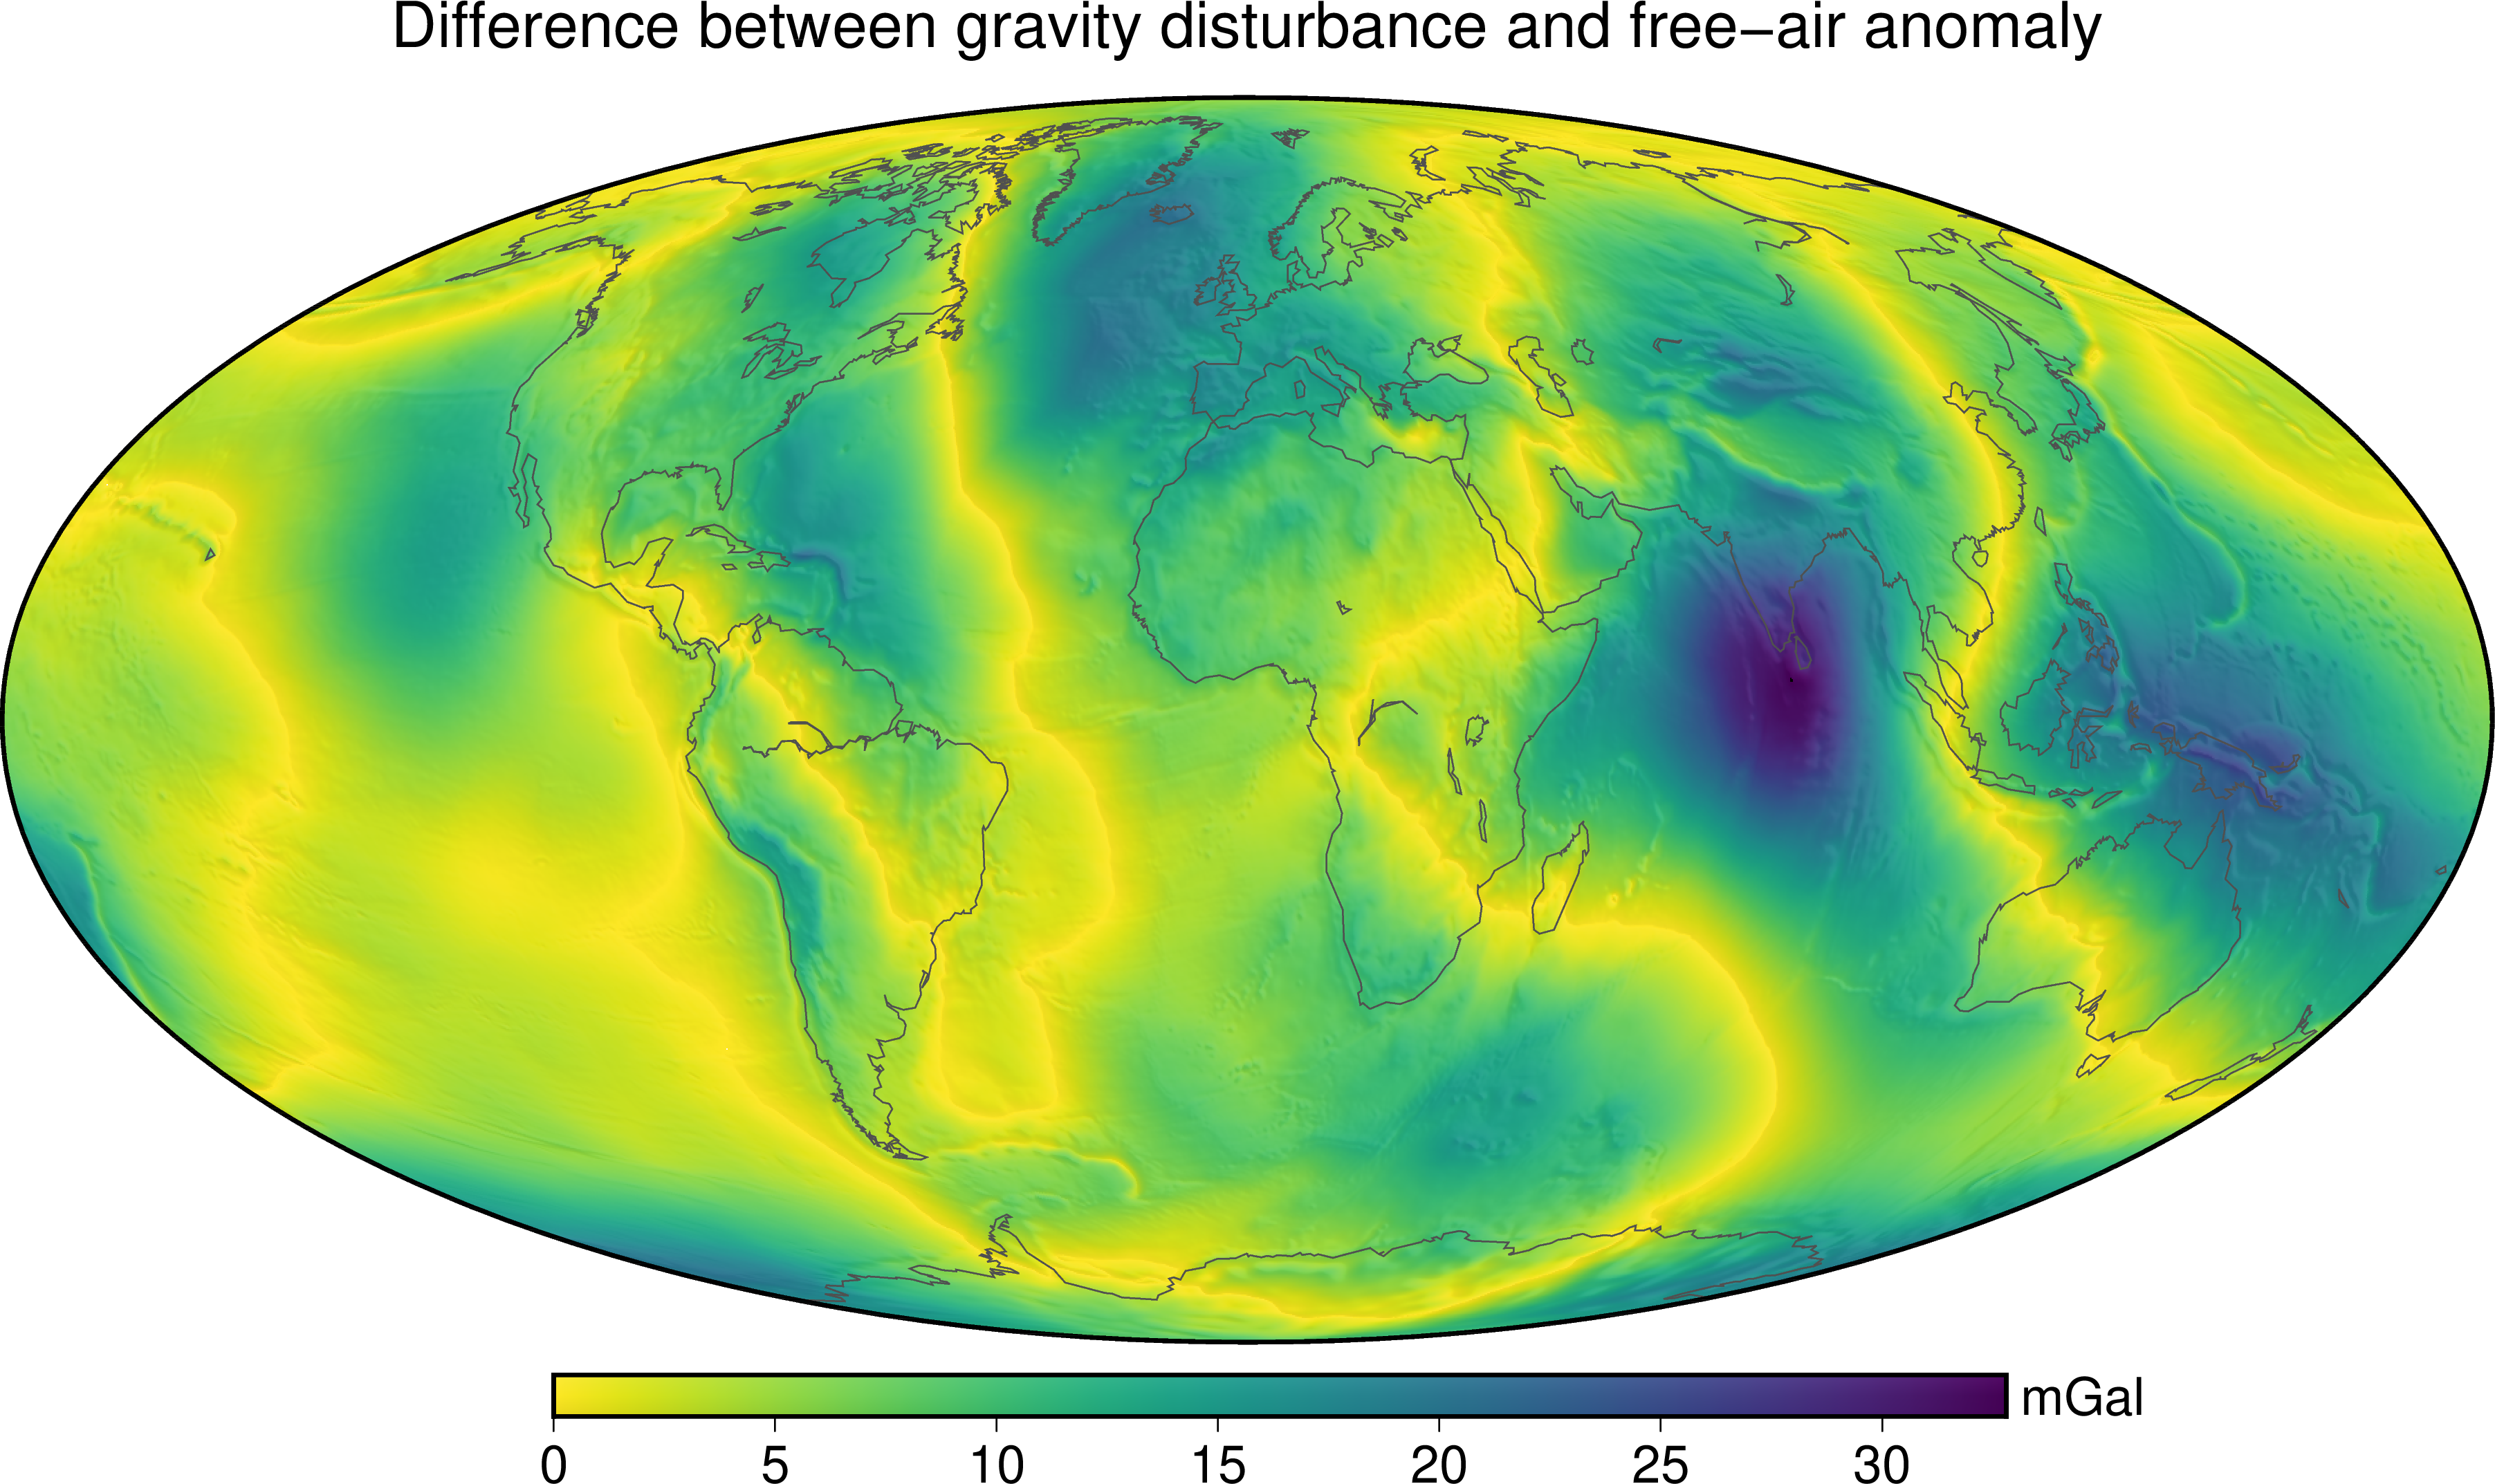

In [4]:
Image('../difference.png', width=500)